In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100000):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias
        return sigmoid(weighted_sum)

    def train(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0 
            for i in range(len(X)):
                y_pred = self.predict(X[i])
                error = y[i] - y_pred
                total_error += error ** 2  
                
                self.weights += self.learning_rate * error * sigmoid_derivative(y_pred) * X[i]
                self.bias += self.learning_rate * error * sigmoid_derivative(y_pred)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Error: {total_error:.4f}")

    def test(self, X):
        predictions = [round(self.predict(x)) for x in X]  
        return predictions
    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        
        Z = np.array([round(self.predict(np.array([xx[i, j], yy[i, j]]))) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
        plt.title("Perceptron Decision Boundary")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()

    

In [55]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y_AND = np.array([0, 0, 0, 1]) 

X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y_OR = np.array([0, 1, 1, 1])  


Training Perceptron for AND Gate:
Epoch 0, Error: 1.7006
Epoch 100, Error: 0.6017
Epoch 200, Error: 0.4360
Epoch 300, Error: 0.3431
Epoch 400, Error: 0.2826
Epoch 500, Error: 0.2393
Epoch 600, Error: 0.2068
Epoch 700, Error: 0.1813
Epoch 800, Error: 0.1609
Epoch 900, Error: 0.1442
Epoch 1000, Error: 0.1303
Epoch 1100, Error: 0.1187
Epoch 1200, Error: 0.1088
Epoch 1300, Error: 0.1002
Epoch 1400, Error: 0.0928
Epoch 1500, Error: 0.0863
Epoch 1600, Error: 0.0806
Epoch 1700, Error: 0.0756
Epoch 1800, Error: 0.0711
Epoch 1900, Error: 0.0670
Epoch 2000, Error: 0.0634
Epoch 2100, Error: 0.0601
Epoch 2200, Error: 0.0571
Epoch 2300, Error: 0.0544
Epoch 2400, Error: 0.0519
Epoch 2500, Error: 0.0496
Epoch 2600, Error: 0.0475
Epoch 2700, Error: 0.0455
Epoch 2800, Error: 0.0437
Epoch 2900, Error: 0.0420
Epoch 3000, Error: 0.0405
Epoch 3100, Error: 0.0390
Epoch 3200, Error: 0.0377
Epoch 3300, Error: 0.0364
Epoch 3400, Error: 0.0352
Epoch 3500, Error: 0.0341
Epoch 3600, Error: 0.0330
Epoch 3700, Err

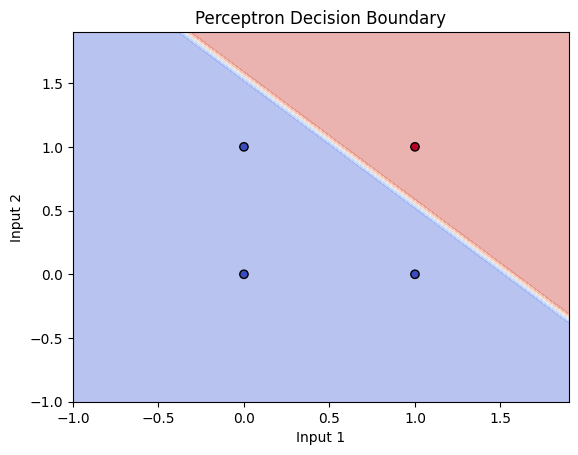

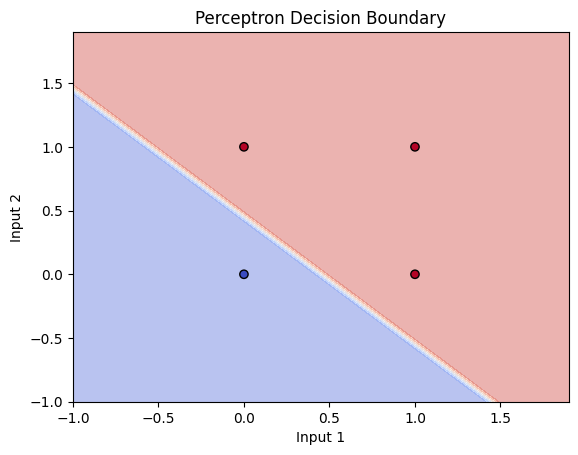

In [56]:
print("\nTraining Perceptron for AND Gate:")
perceptron_AND = Perceptron(input_size=2)
perceptron_AND.train(X_AND, y_AND)
print("Testing AND Gate:", perceptron_AND.test(X_AND))

print("\nTraining Perceptron for OR Gate:")
perceptron_OR = Perceptron(input_size=2)
perceptron_OR.train(X_OR, y_OR)
print("Testing OR Gate:", perceptron_OR.test(X_OR))

perceptron_AND.plot_decision_boundary(X_AND, y_AND)
perceptron_OR.plot_decision_boundary(X_OR, y_OR)

In [57]:
print("AND: ", perceptron_AND.weights, perceptron_AND.bias)
print("OR: ", perceptron_OR.weights, perceptron_OR.bias)   

AND:  [8.01901131 8.01897839] -12.114897150115338
OR:  [8.67108146 8.67110177] -4.101644183962952
